In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

In [21]:
path = './selector_scan/liquor_3_selectors/'
files = os.listdir(path)
GP = {}
KNN = {}
features = {}
for f in files:
    data = pickle.load(open(path+f, 'rb'))
    GP = {**data['GP'], **GP}
    KNN = {**data['KNN'], **KNN}
    features = {**data['features'], **features}

In [22]:
GP_list = [(v[0],v[1],k) for k,v in GP.items()]
KNN_list = [(v[0],v[1],k) for k,v in KNN.items()]
features_list = [(v[0],v[1],k) for k,v in features.items()]


In [23]:
GP_list = sorted(GP_list, key=lambda x: x[0], reverse=True)
KNN_list = sorted(KNN_list, key=lambda x: x[0], reverse=True)
features_list = sorted(features_list, key=lambda x: x[0], reverse=True)

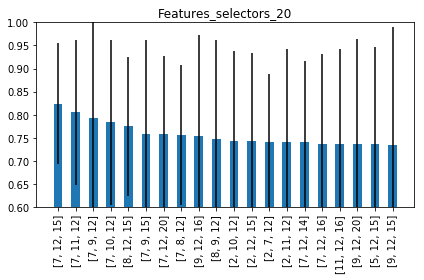

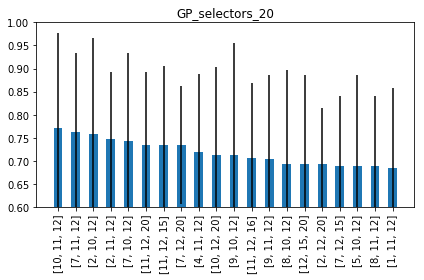

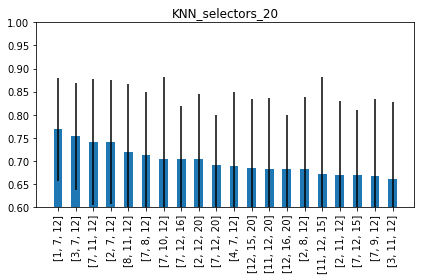

<Figure size 432x288 with 0 Axes>

In [25]:
def plot_heatmap(selector_list, save=False, name=None):
    acc_list = [ele[0] for ele in selector_list]
#     dist_lin = pdist(selector)
    dist_sq = squareform(acc_list)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(dist_sq)
    fig.colorbar(cax)
    if save:
        plt.savefig(path+name+'.png')

def plot_bar(selector_list, title, sub_set=False, sub_set_val=0, save=False):
    acc_list = [ele[0] for ele in selector_list]
    errors = [ele[1] for ele in selector_list]
    names = [ele[2] for ele in selector_list]
    if sub_set:
        title = title+'_'+str(sub_set_val)
        acc_list = acc_list[:sub_set_val]
        errors = errors[:sub_set_val]
        names = names[:sub_set_val]
    xs = [i for i in range(len(acc_list))]
    plt.bar(xs, acc_list, yerr=errors, width=0.5)
    ax = plt.gca()
    plt.title(title)
    ax.set_ylim([0.6,1])
    plt.xticks([i for i in range(len(acc_list))], names, rotation=90)
    plt.tight_layout()
    if save:
        plt.savefig(path+title+'.eps')
    plt.show()
    plt.gcf().clear()
    
plot_bar(features_list, 'Features_selectors', sub_set=True, sub_set_val=20, save=True)
plot_bar(GP_list, 'GP_selectors', sub_set=True, sub_set_val=20, save=True)
plot_bar(KNN_list, 'KNN_selectors', sub_set=True, sub_set_val=20, save=True)

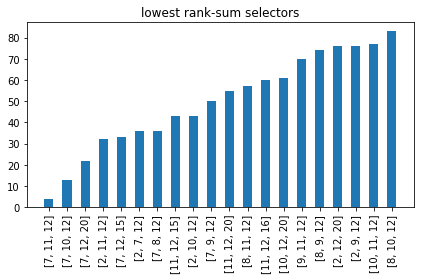

In [26]:
across_classifiers = {name[2]:[i] for i,name in enumerate(GP_list)}
for i, name in enumerate(KNN_list):
    across_classifiers[name[2]].append(i)
for i, name in enumerate(features_list):
    across_classifiers[name[2]].append(i)
score_selectors = {(sum(across_classifiers[ele]),ele) for ele in across_classifiers}
score_selectors = sorted(score_selectors, key=lambda x: x[0])

length = 20
xs = [i for i in range(length)]
value_names = score_selectors[:length]
values = [sel[0] for sel in value_names]
names = [sel[1] for sel in value_names]
plt.bar(xs, values, width=0.5)
plt.title('lowest rank-sum selectors')
plt.xticks(xs, names, rotation=90)
plt.tight_layout()
plt.savefig(path+'lowest_rank_sum_4_selectors_3_cheese.eps')
plt.show()